In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets

In [104]:
class LogisticRegression:
    def __init__(self, lr = 0.01, num_iter = 10000, fit_intercept = True, verbose = False):
        self.lr = lr
        self.num_inter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis = 1)
    
    def __sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def __loss(self, h, y):
        return(-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if(self.fit_intercept):
            X = self.__add_intercept(X)
            
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_inter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
                
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
            
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [105]:
import sklearn.datasets

iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

print(X.shape, y.shape)

(150, 2) (150,)


In [106]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [108]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [109]:
#X = df.values.astype(np.float32)
#X.shape

In [110]:
dfy = pd.DataFrame(data = iris['target'], columns = ['target'])
print(dfy)

     target
0         0
1         0
2         0
3         0
4         0
..      ...
145       2
146       2
147       2
148       2
149       2

[150 rows x 1 columns]


In [111]:
y.shape

(150,)

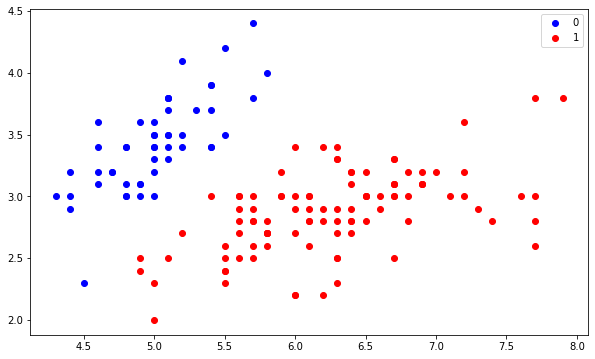

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [113]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [114]:
X_train, X_test, y_train, y_test = X[:100], X[100:], y[:100], y[100:]
print(X_train.shape, y_train.shape)

(100, 2) (100,)


In [115]:
%time model.fit(X_train, y_train)

Wall time: 5.43 s


In [116]:
from sklearn.model_selection import StratifiedKFold

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train):
    #clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]
    model.fit(X_train_folds, y_train_folds)
    y_pred = model.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) 

1.0
1.0
0.9696969696969697


In [117]:
from sklearn.model_selection import StratifiedKFold

skfolds = StratifiedKFold(n_splits=3)
ret = []
rety = []
for train_index, test_index in skfolds.split(X_train, y_train):
    #clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]
    model.fit(X_train_folds, y_train_folds)
    y_pred = model.predict(X_test_fold)
    ret.extend(y_pred)
    rety.extend(y_test_fold)
    #print(len(y_pred))
    #print(y_pred)
    #print((y_pred == y_test_fold))
    

In [118]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ret, rety)

array([[49,  0],
       [ 1, 50]], dtype=int64)

In [119]:
from sklearn.metrics import precision_score, recall_score

precision_score(rety, ret)

0.9803921568627451

In [120]:
recall_score(rety, ret)

1.0

In [121]:
from sklearn.metrics import f1_score
f1_score(rety, ret)

0.99009900990099

In [122]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(rety, ret)

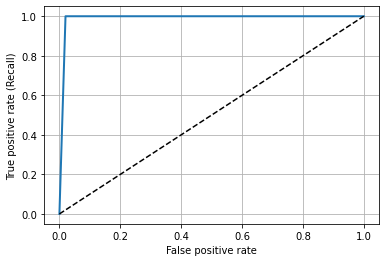

In [123]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis("on")
    plt.grid()
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate (Recall)")
    
plot_roc_curve(fpr, tpr)
plt.show()

In [124]:
from sklearn.metrics import roc_auc_score
roc_auc_score(rety, ret)

0.99

In [125]:
preds = model.predict(X_test)
(preds == y_test).mean()

1.0

In [126]:
model.theta

array([ -5.25078222,  13.63502252, -22.20083488])

[[4.3        2.        ]
 [4.37346939 2.        ]
 [4.44693878 2.        ]
 ...
 [7.75306122 4.4       ]
 [7.82653061 4.4       ]
 [7.9        4.4       ]]


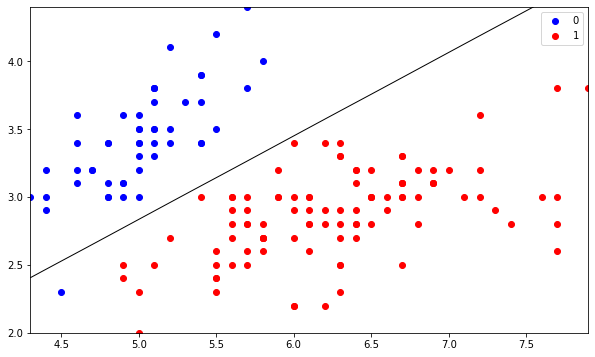

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
print(grid)
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');